# Voting Ensemble Learning

## Classifier

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('csv/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder=LabelEncoder()

In [5]:
df['species']=encoder.fit_transform(df['species'])

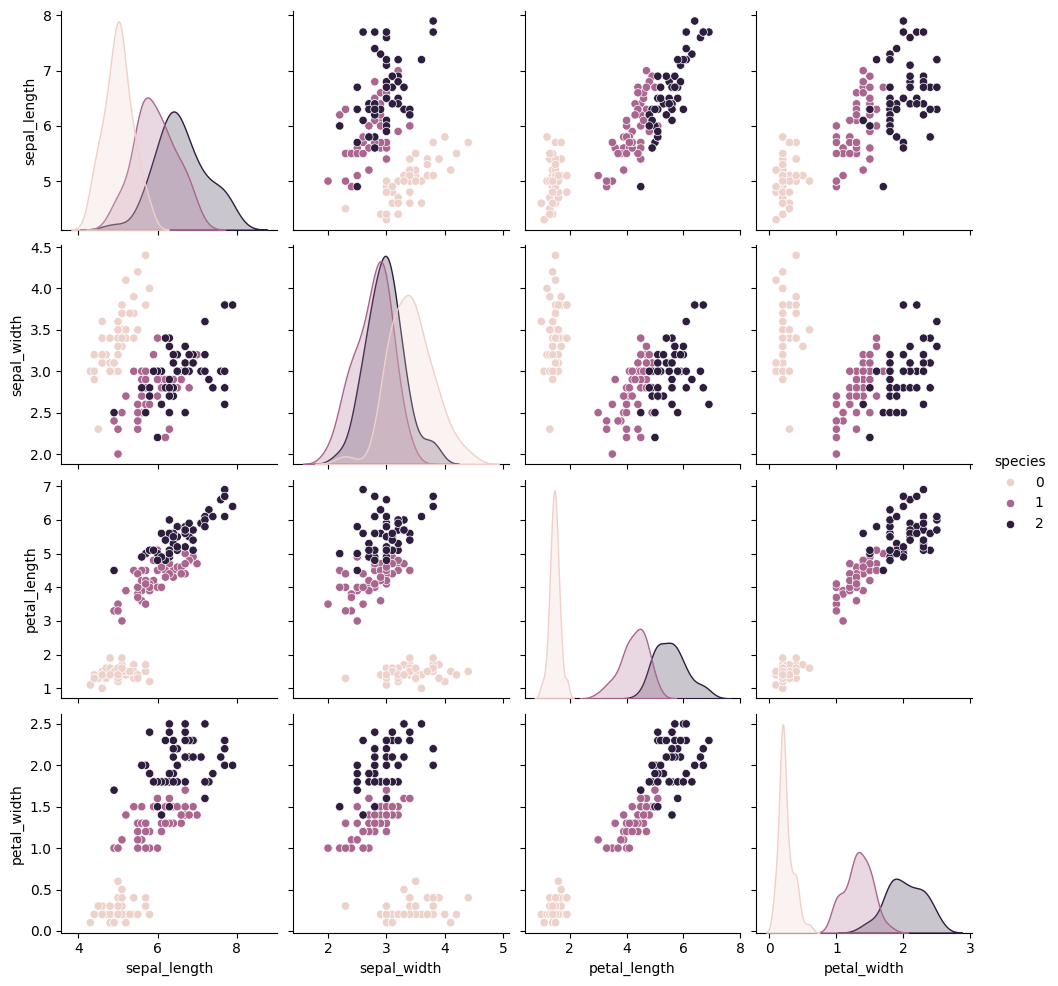

In [6]:
import seaborn as sns

sns.pairplot(df,hue='species')

In [7]:
df=df[df['species']!=0][['sepal_length','sepal_width','species']]
df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [8]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score

In [10]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [11]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

### Hard Voting

In [13]:
vc=VotingClassifier(estimators=estimators,voting='hard')
pred=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
np.round(np.mean(pred),2)

np.float64(0.68)

In [14]:

vc1 = VotingClassifier(estimators=estimators,voting='soft')
pred = cross_val_score(vc1,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(pred),2))

0.65


### Weighted Voting

In [15]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            pred= cross_val_score(vc,x,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(pred),2))
            

for i=1,j=1,k=1 0.66
for i=1,j=1,k=2 0.66
for i=1,j=1,k=3 0.65
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.64
for i=1,j=2,k=3 0.62
for i=1,j=3,k=1 0.61
for i=1,j=3,k=2 0.64
for i=1,j=3,k=3 0.62
for i=2,j=1,k=1 0.67
for i=2,j=1,k=2 0.67
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.66
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.66
for i=2,j=3,k=1 0.62
for i=2,j=3,k=2 0.64
for i=2,j=3,k=3 0.65
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.67
for i=3,j=2,k=2 0.66
for i=3,j=2,k=3 0.64
for i=3,j=3,k=1 0.65
for i=3,j=3,k=2 0.64
for i=3,j=3,k=3 0.65


In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [17]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


## Regression

In [18]:
from sklearn.datasets import *

In [19]:
X,y=load_digits(return_X_y=True)

In [20]:
y.shape

(1797,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [22]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr=SVR()

In [23]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [24]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.53
dt 0.61
svr 0.82


In [25]:
from sklearn.ensemble import VotingRegressor

vr=VotingRegressor(estimators)
scores=cross_val_score(vr,X,y,scoring='r2',cv=10)
np.round(np.mean(scores),2)

np.float64(0.78)

In [26]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))


For i=1,j=1,k=1 0.77
For i=1,j=1,k=2 0.8
For i=1,j=1,k=3 0.81
For i=1,j=2,k=1 0.78
For i=1,j=2,k=2 0.8
For i=1,j=2,k=3 0.81
For i=1,j=3,k=1 0.76
For i=1,j=3,k=2 0.78
For i=1,j=3,k=3 0.8
For i=2,j=1,k=1 0.74
For i=2,j=1,k=2 0.77
For i=2,j=1,k=3 0.78
For i=2,j=2,k=1 0.76
For i=2,j=2,k=2 0.78
For i=2,j=2,k=3 0.79
For i=2,j=3,k=1 0.76
For i=2,j=3,k=2 0.77
For i=2,j=3,k=3 0.79
For i=3,j=1,k=1 0.71
For i=3,j=1,k=2 0.74
For i=3,j=1,k=3 0.76
For i=3,j=2,k=1 0.74
For i=3,j=2,k=2 0.76
For i=3,j=2,k=3 0.78
For i=3,j=3,k=1 0.75
For i=3,j=3,k=2 0.76
For i=3,j=3,k=3 0.78


In [27]:
dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)
     

In [28]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))
     

lr 0.53
dt 0.6
svr 0.82


In [29]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.78


# Bagging Ensemble Learning

In [37]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [38]:
x,y=make_classification(n_samples=10000,n_features=10,n_informative=3)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
dt=DecisionTreeRegressor(random_state=42)

In [41]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.906

In [44]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [46]:
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [47]:
y_pred=bagging.predict(x_test)
accuracy_score(y_test,y_pred)

0.934

In [49]:
bagging.estimators_samples_

[array([2523, 3113, 7114, ..., 5668, 7066, 3677],
       shape=(4000,), dtype=int32),
 array([4782,  663, 7155, ..., 3122, 2141, 5379],
       shape=(4000,), dtype=int32),
 array([5462, 6574, 4896, ..., 6686, 4871, 6424],
       shape=(4000,), dtype=int32),
 array([2848, 2629, 1591, ...,  595, 4333, 1671],
       shape=(4000,), dtype=int32),
 array([3821, 6494, 1606, ..., 1645, 3358,  388],
       shape=(4000,), dtype=int32),
 array([2261, 7922, 3649, ..., 7532, 6138, 1483],
       shape=(4000,), dtype=int32),
 array([ 652, 1676, 2291, ..., 2618,  113, 7628],
       shape=(4000,), dtype=int32),
 array([2478, 4107, 1958, ..., 5175, 7270, 3055],
       shape=(4000,), dtype=int32),
 array([5800, 3548, 6540, ..., 5313, 2336, 6608],
       shape=(4000,), dtype=int32),
 array([5256, 7181, 3409, ..., 3860, 3417, 5180],
       shape=(4000,), dtype=int32),
 array([2675, 2834, 3817, ...,  270, 2233,  103],
       shape=(4000,), dtype=int32),
 array([3236, 7607, 4600, ..., 5180, 5002, 3192],
    

### Bagging using SVM

In [50]:
bagging=BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [51]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

0.9

### Pasting

In [52]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [53]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    4.8s remaining:   24.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    4.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


0.9295

### Random Subspaces

In [57]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    random_state=42,
    bootstrap_features=True
)

In [58]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

0.908

### Random Patches

In [59]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42,
    bootstrap_features=True,
    max_features=0.5
)

In [60]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

0.9025

## OOB Score

In [61]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42,
    oob_score=True
)

In [62]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

0.928

## Bagging Tips
-Bagging generally gives better results than Pasting

-Good results come around the 25% to 50% row sampling mark

-Random patches and subspaces should be used while dealing with high dimensional data

-To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

## Applying GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }
     

In [66]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [67]:
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [68]:
search.best_params_,search.best_score_

({'bootstrap': True,
  'max_features': 1.0,
  'max_samples': 1.0,
  'n_estimators': 50},
 np.float64(0.9328749999999999))

In [69]:
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True
)

In [70]:
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
accuracy_score(y_pred,y_test)

0.9305

## Regression

In [77]:
data = load_diabetes()
X = data.data
y = data.target

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [81]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred1 = lr.predict(x_test)
y_pred2 = dt.predict(x_test)
y_pred3 = knn.predict(x_test)

In [83]:
print("R^2 score for LR",r2_score(y_test,y_pred1))
print("R^2 score for DT",r2_score(y_test,y_pred2))
print("R^2 score for KNN",r2_score(y_test,y_pred3))

R^2 score for LR 0.4526027629719197
R^2 score for DT 0.08569769431258056
R^2 score for KNN 0.43016439526042805


In [84]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [85]:

y_preds = bag_regressor.predict(x_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(x_train, y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(x_test, y_test))


Training Coefficient of R^2 : 0.895
Test Coefficient of R^2 : 0.386


In [86]:
n_samples = data.data.shape[0]
n_features = data.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(x_train, y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


ValueError: Invalid parameter 'base_estimator' for estimator BaggingRegressor(n_jobs=-1, random_state=1). Valid parameters are: ['bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].